In [36]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
train = pd.read_csv('Data/car data.csv')
train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [38]:
train.shape

(301, 9)

In [39]:
TARGET_COL = 'Selling_Price'

## **2. Number of Sample and Variable**

In [40]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
features = [c for c in train.columns if c not in [TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 301 samples and 9 variables

The dataset contains 8 features


## **3.Target Distribution**


This is a regression problem. Let's look the at the 'Selling_Price' distribution

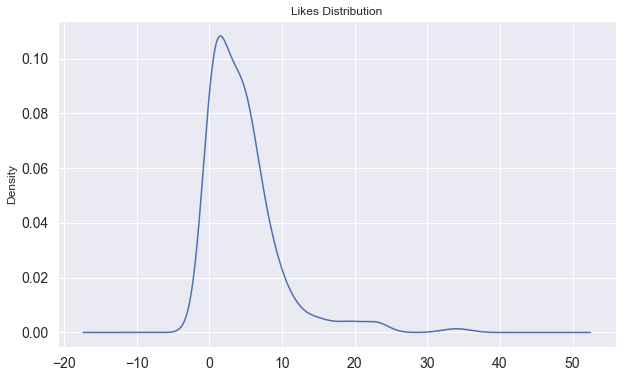

In [41]:
_ = train[TARGET_COL].plot(kind = 'density', fontsize=14, figsize=(10, 6))

Right Skewed Data.
What can we do to change this distribution and make it more normal ?

Let's the see the same for boxplot.

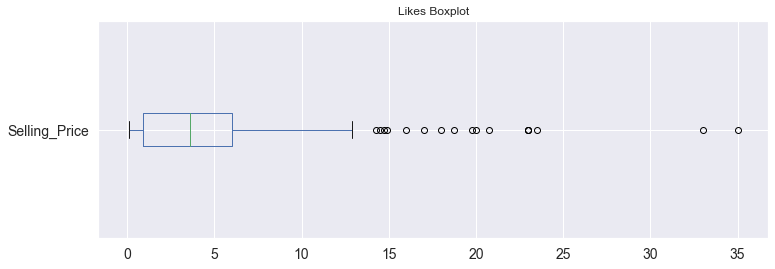

In [43]:
_ = train[TARGET_COL].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Likes Boxplot', fontsize=14)

In [44]:
train[train.Selling_Price >13]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,innova,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0


### **4. Variable Datatypes**


Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## **5. Null Values**

In [46]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

Owner            0.0
Transmission     0.0
Seller_Type      0.0
Fuel_Type        0.0
Kms_Driven       0.0
Present_Price    0.0
Selling_Price    0.0
Year             0.0
Car_Name         0.0
dtype: float64

ther is no null value is are ther in our data set


## **6. Unique values in each variable**

In [47]:
train.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

## **Analyzing Each Variable & their relationships**

Also our target is Continuous

For each feature type we will be perform two types of analysis:

Univariate: Analyze 1 feature at a time

Bivariate: Analyze the relationship of that feature with target variable, i.e. 'likes'

In [48]:
train.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## **Numerical Variables**

In [49]:
num_cols = ['Year','Present_Price','Kms_Driven']

### **Univariate Analyis**

### **Boxplots**

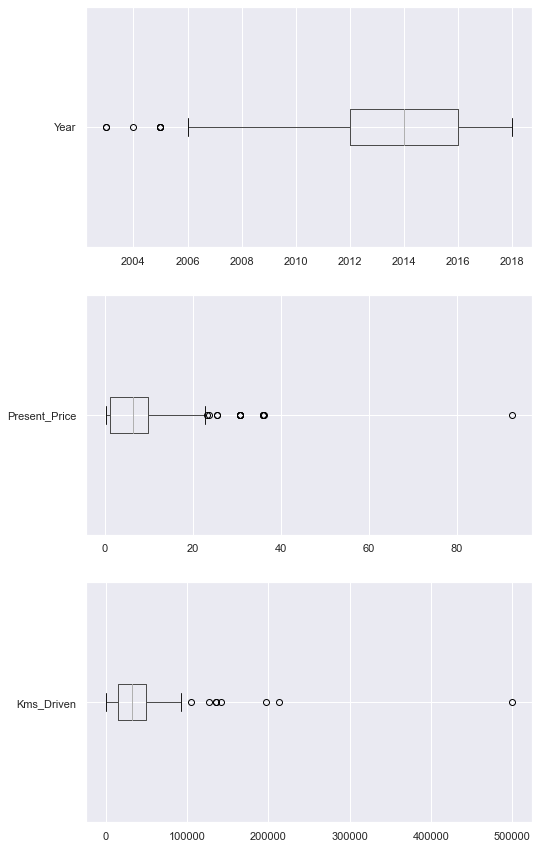

In [50]:
fig,axes = plt.subplots(3,1,figsize= (8,15))
for i,c in enumerate(num_cols):
    _ = train[[c]].boxplot(ax=axes[i], vert=False)

**Density Plots**

In [51]:
train['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

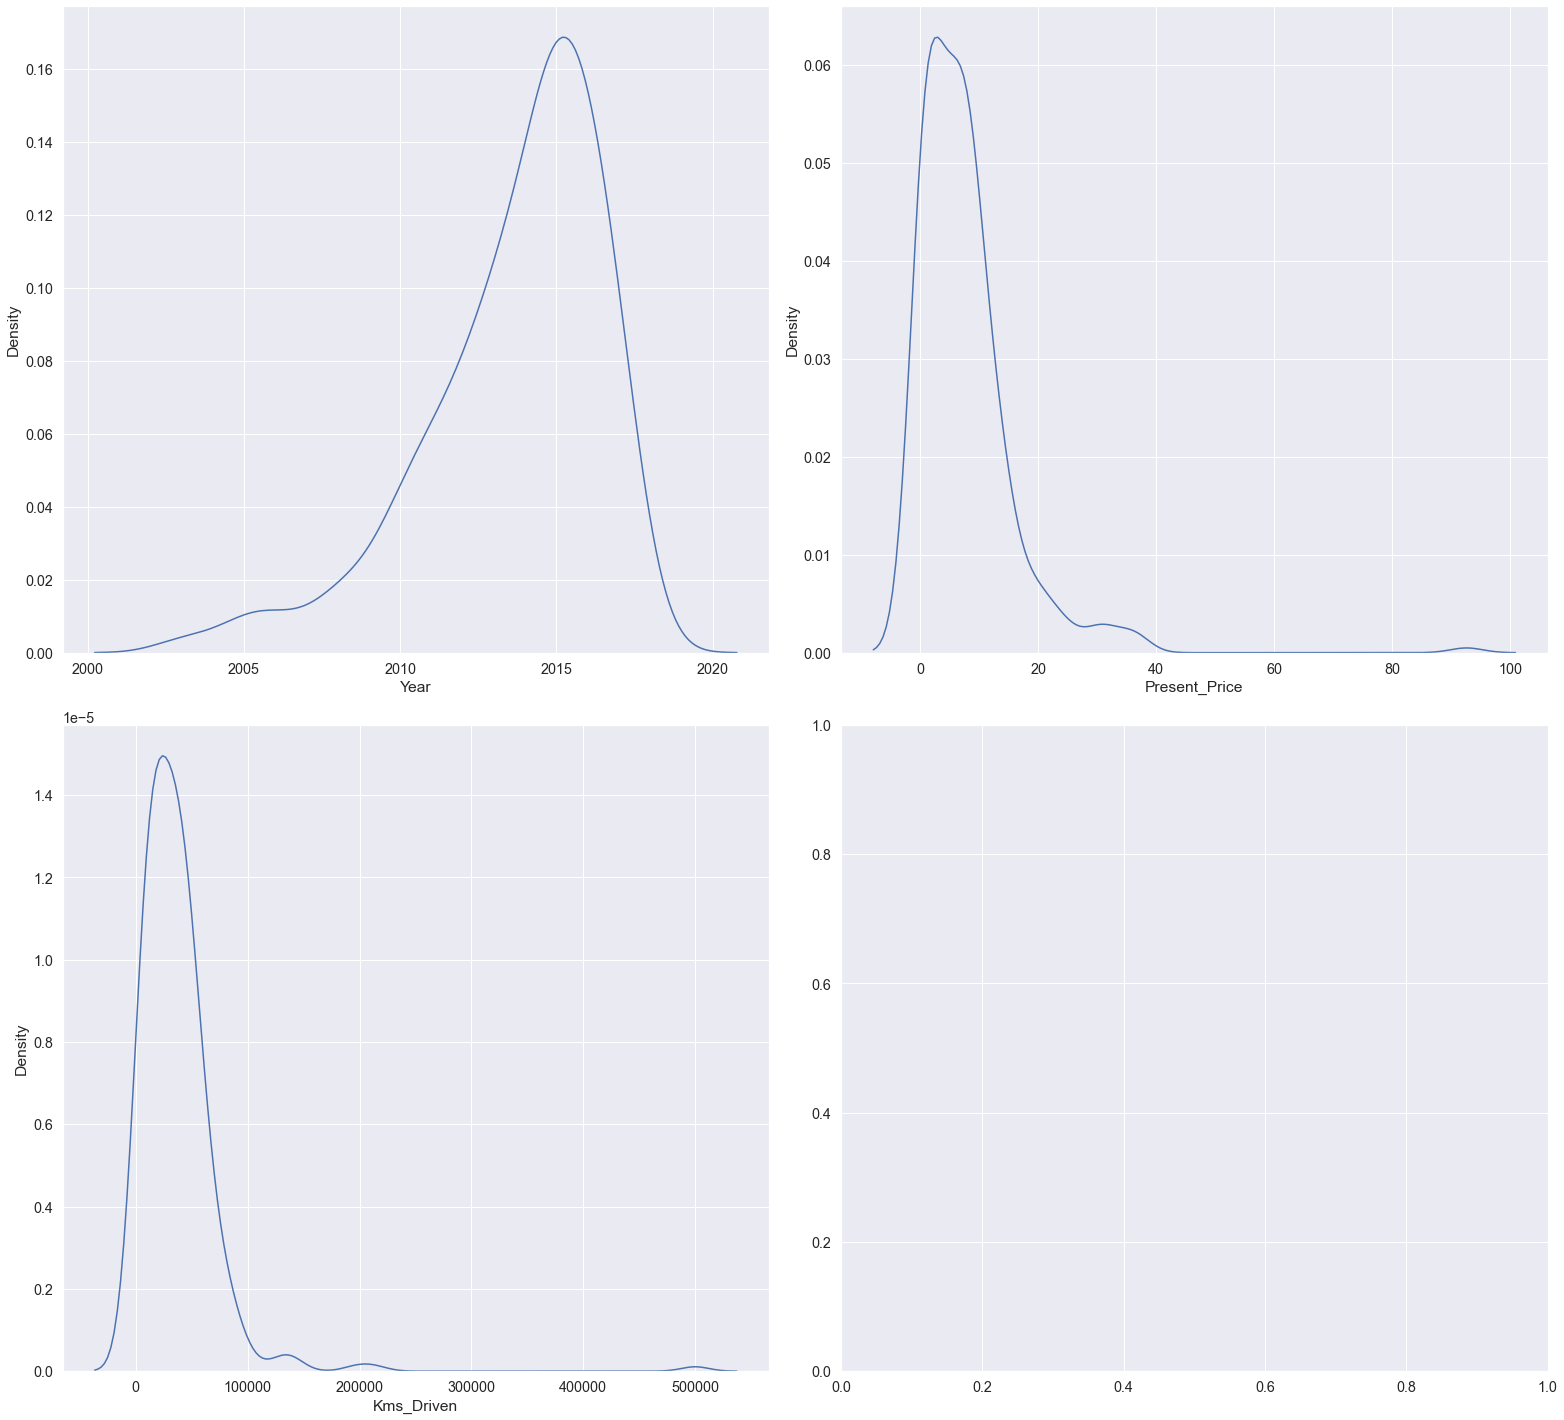

In [52]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(22, 20))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(train[c], ax=axes[i])
plt.tight_layout()

## **Bivariate Analysis**


Correlation HeatMaps

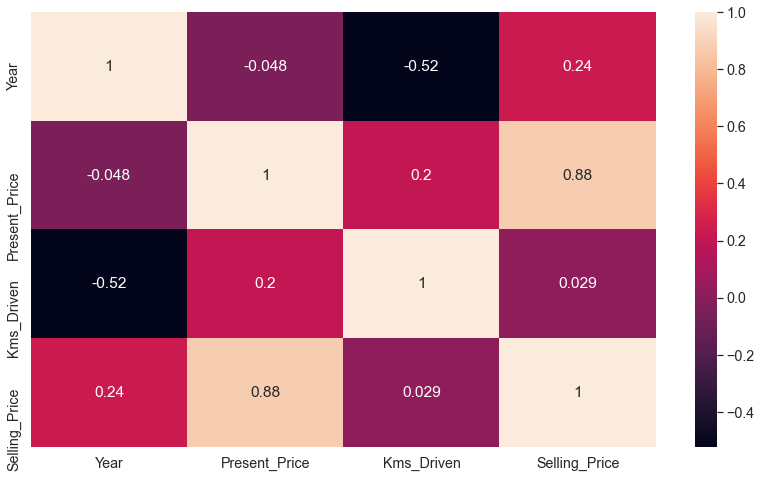

In [53]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols+ ['Selling_Price']].corr(), annot=True)

In [54]:
num_cols = num_cols + ['Selling_Price']
num_cols

['Year', 'Present_Price', 'Kms_Driven', 'Selling_Price']

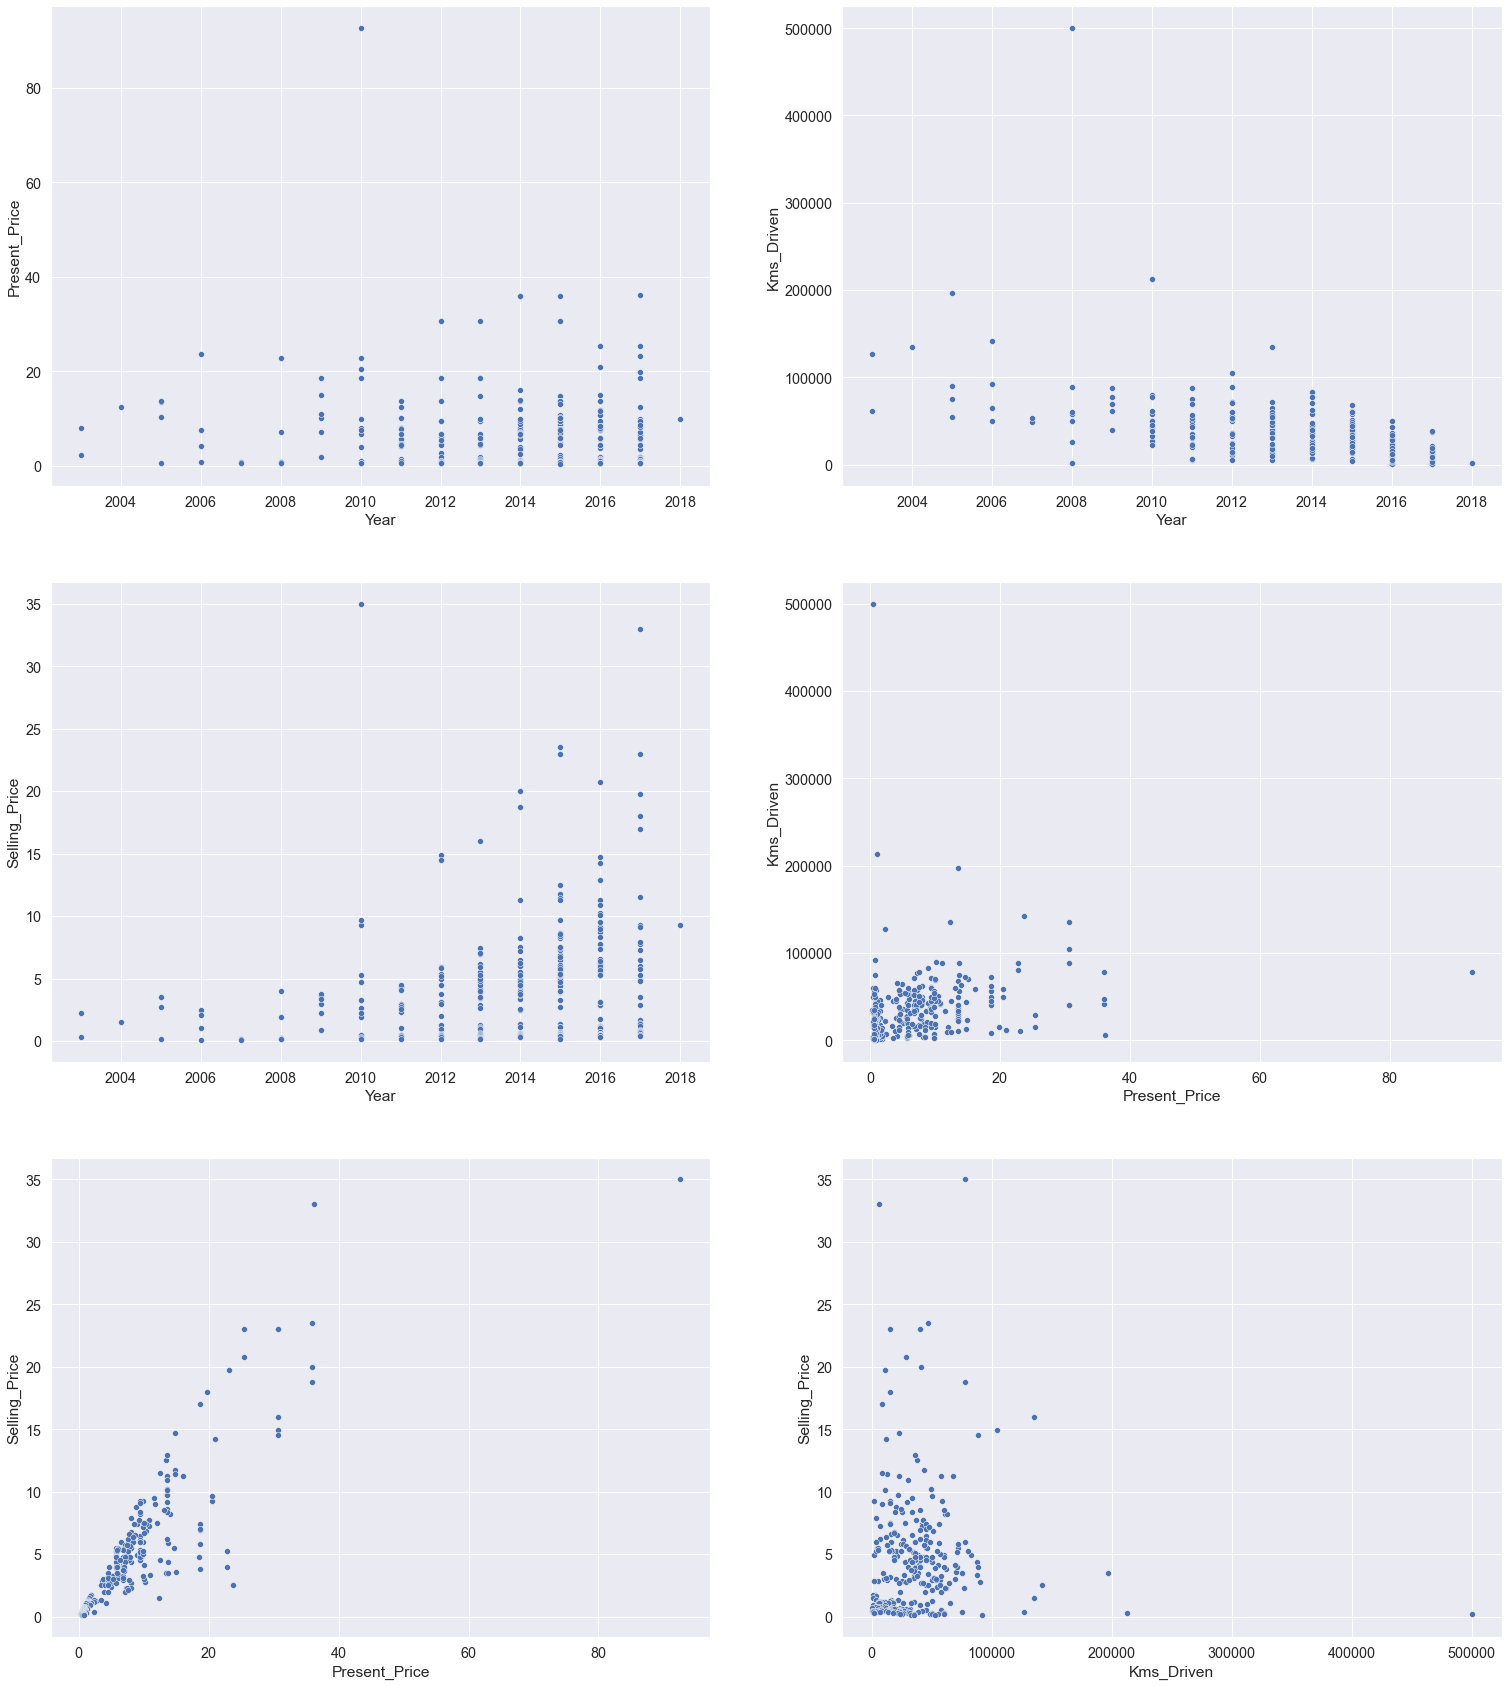

In [55]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(26, 30))
axes = [ax for axes_row in axes for ax in axes_row]
a = 0
for i in range(len(num_cols)):
    for j in range(i+1,len(num_cols)):
        sns.scatterplot(x= num_cols[i],y=num_cols[j],data=train,ax = axes[a])
        a = a+1
       

## **Categorical Variables**

### **Univariate Analysis**

Pie Chart

In [56]:
train.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [57]:
cat_cols = ['Car_Name','Fuel_Type','Seller_Type','Transmission', 'Owner']

In [58]:
def pie_chart(cat_cols,data):
    l = len(cat_cols)
    f = int((l+1)/2)
    s = int(l/2)
    fig, axes = plt.subplots(f, s, figsize=(22,6*f))
    axes = [ax for axes_row in axes for ax in axes_row]
    for i, c in enumerate(cat_cols):
        _ = data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
        _ = axes[i].set_ylabel('')

    _ = plt.tight_layout()

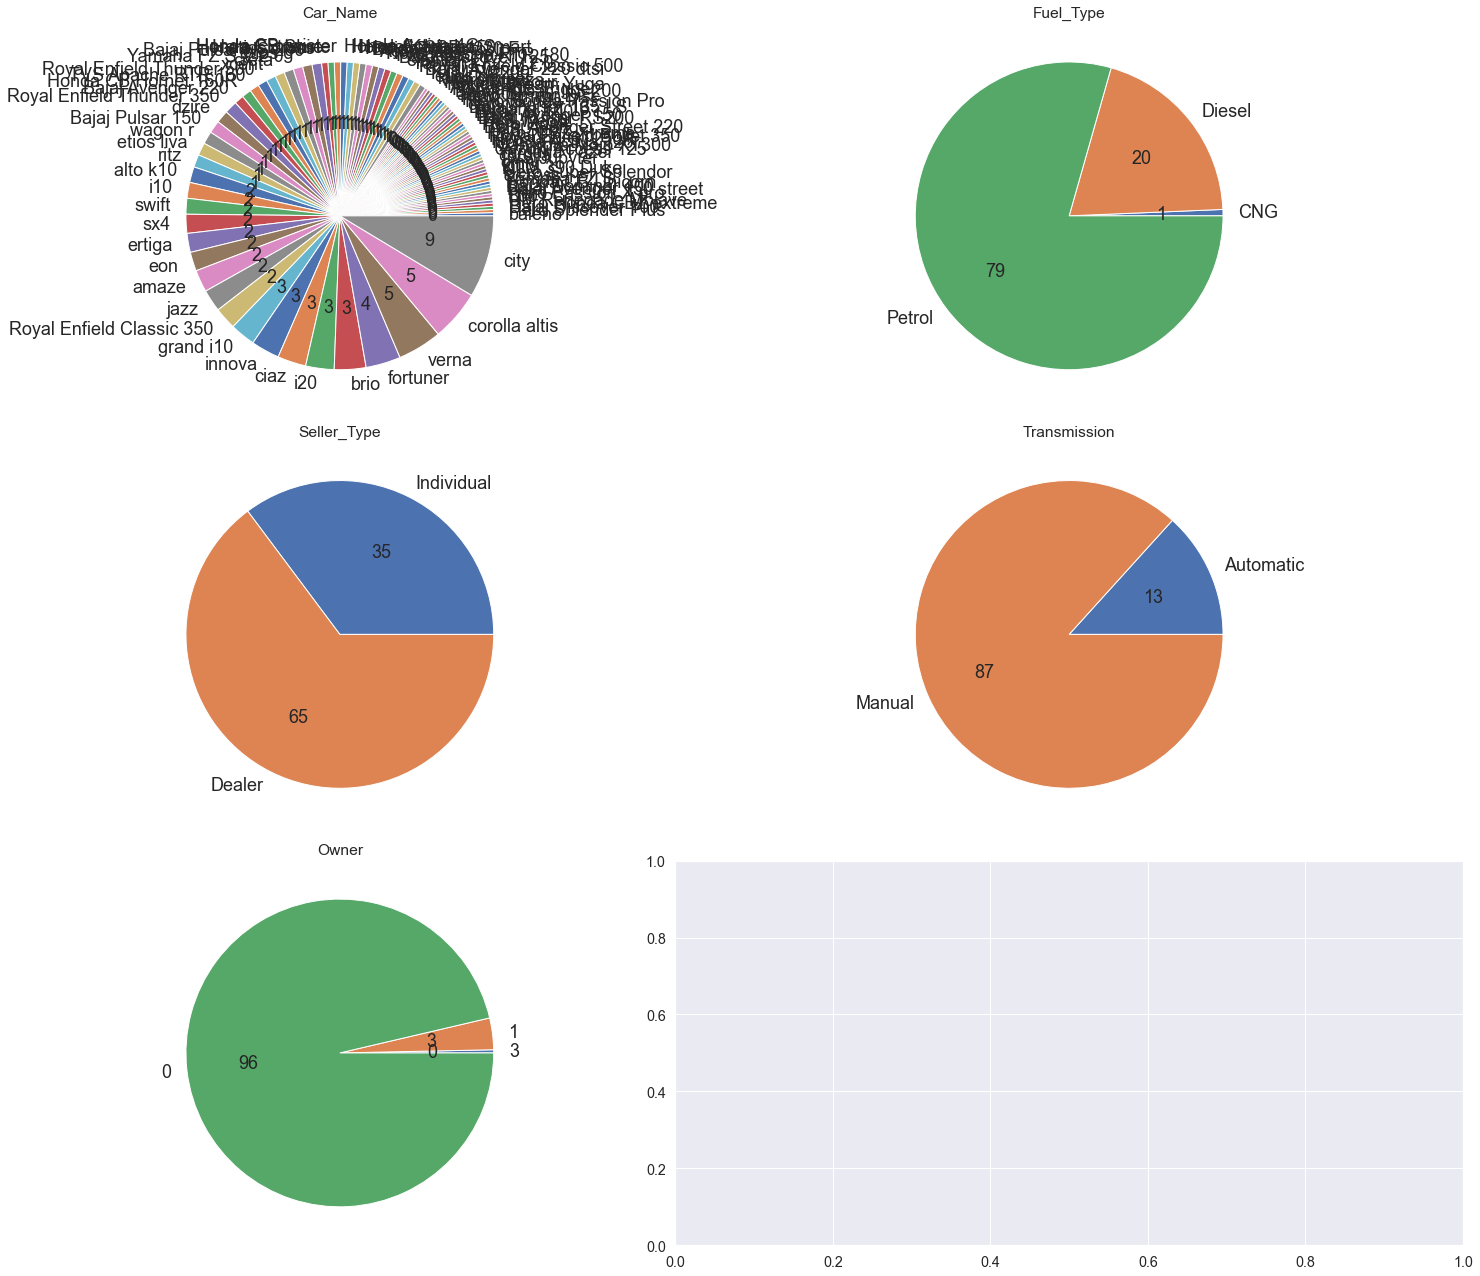

In [59]:
pie_chart(cat_cols,train)

## **Horizontal Bar Plots**

In [60]:
def bar_plots(cat_cols,data):
  l = len(cat_cols)
  f = int((l+1)/2)
  s = int(l/2)
  fig, axes = plt.subplots(f, s, figsize=(16, 6*f))
  axes = [ax for axes_row in axes for ax in axes_row]

  for i, c in enumerate(train[cat_cols]):
      _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
      
  _ = plt.tight_layout()

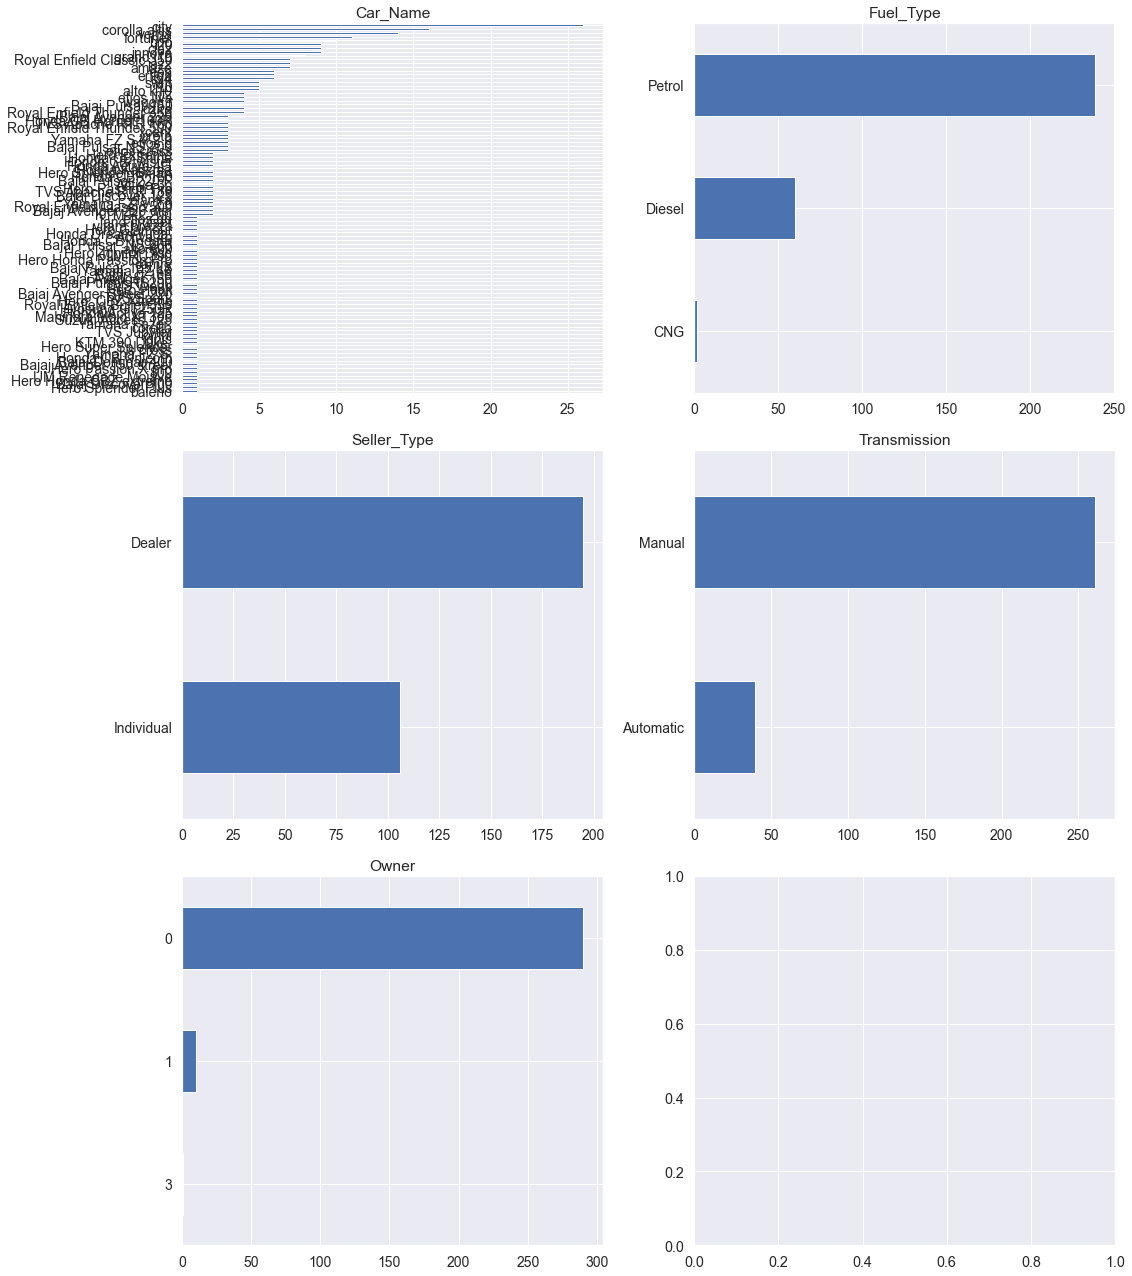

In [61]:
bar_plots(cat_cols,train)

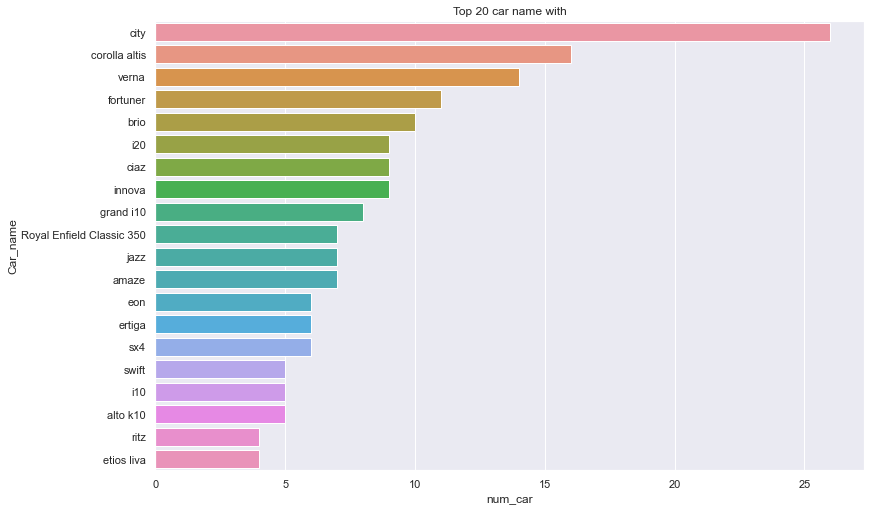

In [62]:
sns.set(rc={'figure.figsize':(12.7, 8.27)})

top_20_channels = train['Car_Name'].value_counts()[:20].reset_index()
top_20_channels.columns = ['Car_name', 'num_car']

_ = sns.barplot(data = top_20_channels, y = 'Car_name', x = 'num_car')
_ = plt.title("Top 20 car name with")

## **featur engineering**

In [63]:
train['current_year'] = 2020

In [64]:
train['no_year']= train['current_year']- train['Year']

In [65]:
train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [66]:
train.drop(['current_year'],axis=1,inplace=True)

In [67]:
train.to_csv('Data/dataset.csv')